In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
model_folder = "../training/saved/2024-03-07/2_1"
model_path = f"{model_folder}/model"
model = tf.keras.models.load_model(model_path)
chord_labels = ["a", "am", "bm", "c", "d", "dm", "e", "em", "f", "g"]
folder_path = "../../data/archived/JimChords2012/"

predictions = {

}

In [42]:
a = [-1, 0, 2, 2, 2, 0]
am = [-1, 0, 2, 2, 1, 0]
bm = [-1, 2, 4, 4, 3, 2]
c = [-1, 3, 2, 0, 1, 0]
d = [-1, -1, 0, 2, 3, 2]
dm = [-1, -1, 0, 2, 3, 1]
e = [0, 2, 2, 1, 0, 0]
em = [0, 2, 2, 0, 0, 0]
f = [-1, 3, 3, 2, 1, -1]
g = [3, 2, 0, 0, 3, 3]

pitches = [40,45,50,55,59,64]

TEST_ONLY_CLEAR = True

chords = {
    "a" : a,
    "am" : am,
    "bm": bm,
    "c" : c,
    "d" : d,
    "dm" : dm,
    "e" : e,
    "em" : em,
    "f" : f,
    "g" : g
}

In [43]:
def get_predicted_strum(y):
    result = []
    for string in y:
        summed_arr = np.sum(string, axis=0)
        result.append(int(np.argmax(summed_arr) - 1))
    return result

In [44]:
def get_tab_score(pattern, predict):
    score = 0
    for i in range(len(pattern)):
        if pattern[i] == predict[i]:
            score += 1
    return score

def get_pitch_score(pattern, predict):
    pch = []
    for pitch in range(len(pitches)):
        if pattern[pitch] != -1:
            pch.append(pitches[pitch] + pattern[pitch])

    score = 0
    for i in range(len(predict)):
        if predict[i] == -1 and pattern[i] == -1: # If the string is muted, the string in pattern should also be muted
            score += 1
        elif predict[i] != -1 and pitches[i] + predict[i] in pch: #otherwise check if maybe the current string plays a pitch not necessary from the same string in pattern
            score += 1
            pch.remove(pitches[i] + predict[i])
    return score

In [45]:
def test_npz(npz_path):
    X = np.load(npz_path)
    frames = len(X["repr"])
    full_x = np.pad(X["repr"], [(4, 4), (0, 0)], mode='constant')
    X = np.empty((frames, 288, 9, 1))
    for i in range(frames):
        sample = full_x[i:i + 9]
        X[i,] = np.expand_dims(np.swapaxes(sample, 0, 1), -1)

    y = model.predict(X, verbose=0)
    return get_predicted_strum(y)

In [46]:
for label in chord_labels:
    path = folder_path + label + "/"
    for file in os.listdir(path):
        aux_file = file
        aux_file_index = int(aux_file.replace('.wav.npz', '').replace(label, ''))
        if not(TEST_ONLY_CLEAR) or (TEST_ONLY_CLEAR and aux_file_index <= 100):
            file_name = file.split('.')[0]
            strum = test_npz(path + file)
            print(f"{file.split('.')[0]} : {test_npz(path + file)}")
            if label not in predictions.keys():
                predictions[label] = {}
            predictions[label][file_name] = strum

a1 : [-1, 0, 2, 2, 2, 0]
a10 : [-1, 0, 2, 2, 2, -1]
a100 : [-1, 0, 2, 6, 2, -1]
a11 : [5, 7, 7, 6, 2, -1]
a12 : [-1, -1, 7, 2, 2, 5]
a13 : [0, 0, 2, 2, 2, 0]
a14 : [-1, 0, 2, 2, 2, 0]
a15 : [-1, 7, 2, 6, 2, -1]
a16 : [0, 0, 2, 2, 0, 0]
a17 : [-1, 0, 2, 2, 2, 0]
a18 : [-1, 0, 2, 2, 2, 0]
a19 : [0, 0, 2, 2, 2, 0]
a2 : [-1, 0, 2, 2, 2, -1]
a20 : [-1, 0, 2, 2, 2, 0]
a21 : [-1, 0, 2, 2, 2, 0]
a22 : [-1, 7, 2, 2, 2, 0]
a23 : [-1, 0, 2, 2, 2, 0]
a24 : [0, 0, 2, 2, 2, 0]
a25 : [-1, 7, 2, 2, 2, -1]
a26 : [-1, 0, 2, 6, 2, 0]
a27 : [-1, 0, 2, 2, 2, 0]
a28 : [-1, 0, 2, 2, 2, 0]
a29 : [0, 0, 2, 2, 2, 0]
a3 : [0, 0, 2, 2, 2, 0]
a30 : [0, 0, 2, 2, 2, 0]
a31 : [0, 0, 2, 2, 2, 0]
a32 : [-1, 7, 2, 6, 2, 5]
a33 : [-1, 7, 2, 6, 2, 5]
a34 : [-1, 7, 2, 6, 2, -1]
a35 : [-1, 7, 2, 6, 2, 5]
a36 : [0, 0, 2, 2, 2, 0]
a37 : [0, 0, 2, 2, 0, 0]
a38 : [0, 0, 2, 2, 2, 0]
a39 : [-1, 0, 2, 2, -1, -1]
a4 : [-1, 7, 2, 6, 2, 0]
a40 : [-1, 0, 2, 2, -1, 0]
a41 : [-1, 7, 2, 6, 2, -1]
a42 : [-1, 7, 2, 6, 2, -1]
a43 : [0, 0, 2

In [47]:
#write dictionary in json format
import json

with open(f'{model_folder}/jim_chords_predictions.json', 'w') as file:
    json.dump(predictions, file, indent=4)

# with open(f'{model_folder}/jim_chords_predictions.json', 'r') as file:
#     predictions = json.load(file)

In [48]:
stats_tab = {}
stats_pitch = {}
for chord_label, chord_predictions in predictions.items():
    sorted_by_custom_rule = dict(sorted(chord_predictions.items(), key=lambda item: get_tab_score(chords[chord_label], item[1])))
    tab_score_freq = [0, 0, 0, 0, 0, 0, 0] # index means the score
    pitch_score_freq = [0, 0, 0, 0, 0, 0, 0]
    for l, s in sorted_by_custom_rule.items():
        tab_score = get_tab_score(chords[chord_label], s)
        pitch_score = get_pitch_score(chords[chord_label], s)
        # print(f"{l} : {s} tab score: {tab_score}")
        tab_score_freq[tab_score] += 1
        pitch_score_freq[pitch_score] += 1
    print(f"{chord_label} : tab freq: {tab_score_freq} | pitch freq: {pitch_score_freq}")
    stats_tab[chord_label] = tab_score_freq
    stats_pitch[chord_label] = pitch_score_freq

a : tab freq: [0, 2, 2, 15, 21, 35, 25] | pitch freq: [0, 0, 0, 12, 25, 38, 25]
am : tab freq: [0, 0, 0, 0, 10, 51, 39] | pitch freq: [0, 0, 0, 0, 10, 51, 39]
bm : tab freq: [0, 1, 18, 28, 36, 16, 1] | pitch freq: [0, 1, 18, 28, 36, 16, 1]
c : tab freq: [0, 1, 2, 7, 9, 31, 50] | pitch freq: [0, 1, 0, 9, 9, 31, 50]
d : tab freq: [0, 5, 28, 26, 30, 10, 1] | pitch freq: [0, 0, 15, 27, 42, 15, 1]
dm : tab freq: [0, 46, 23, 20, 9, 2, 0] | pitch freq: [0, 0, 12, 16, 24, 48, 0]
e : tab freq: [0, 2, 1, 5, 6, 13, 73] | pitch freq: [0, 2, 1, 5, 6, 13, 73]
em : tab freq: [0, 0, 0, 1, 5, 13, 81] | pitch freq: [0, 0, 0, 1, 5, 13, 81]
f : tab freq: [0, 0, 2, 2, 30, 61, 5] | pitch freq: [0, 0, 0, 4, 30, 61, 5]
g : tab freq: [4, 4, 7, 10, 46, 24, 5] | pitch freq: [3, 3, 9, 10, 46, 24, 5]


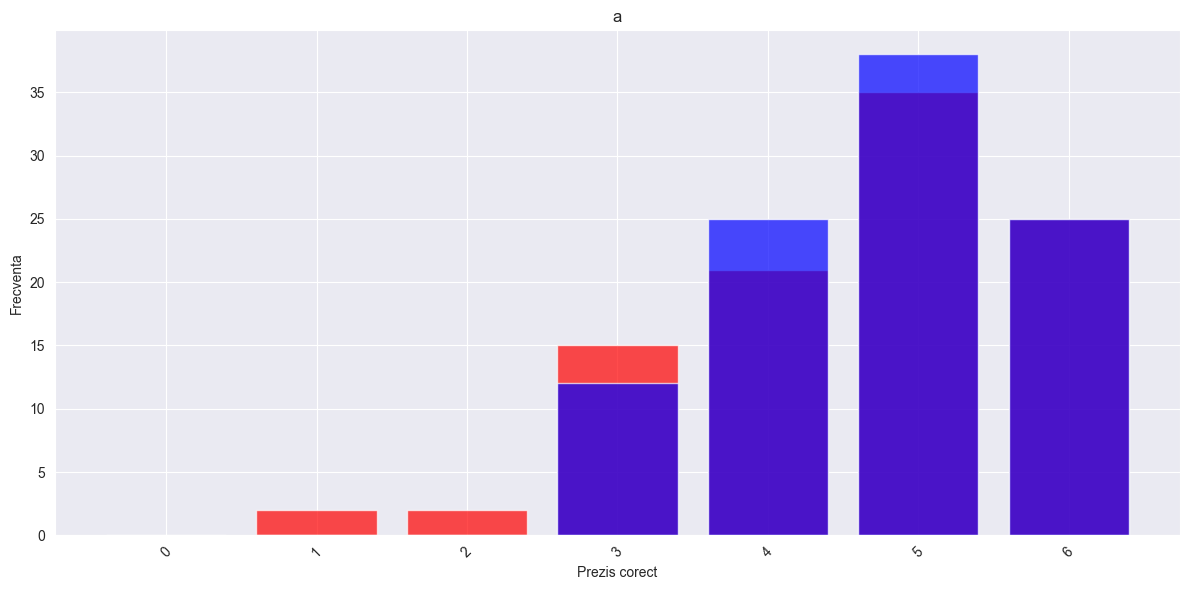

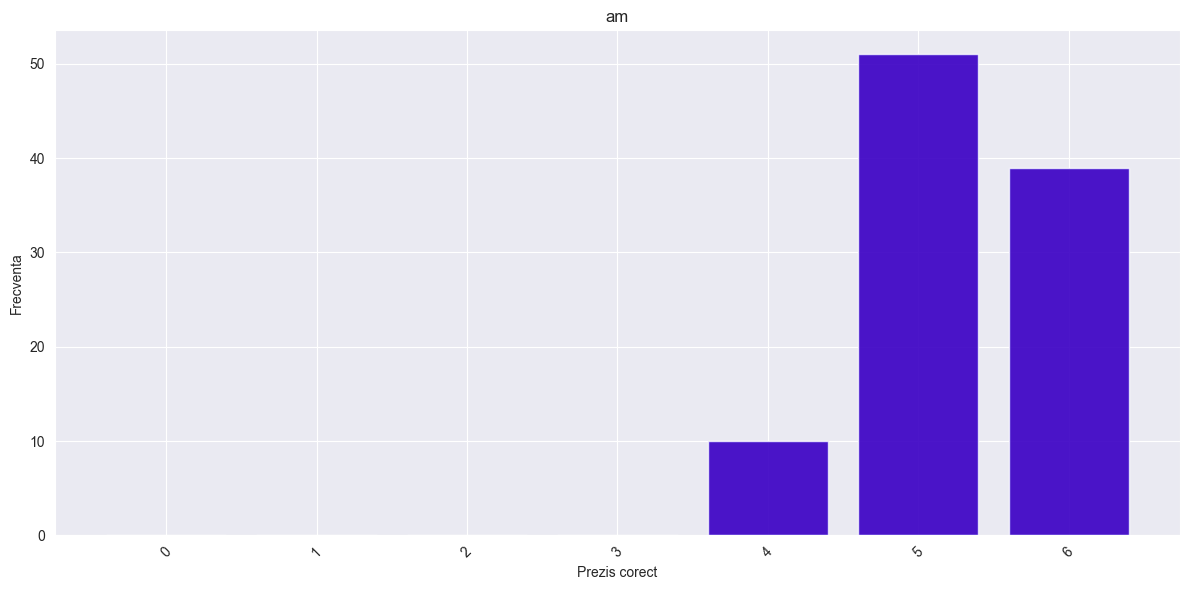

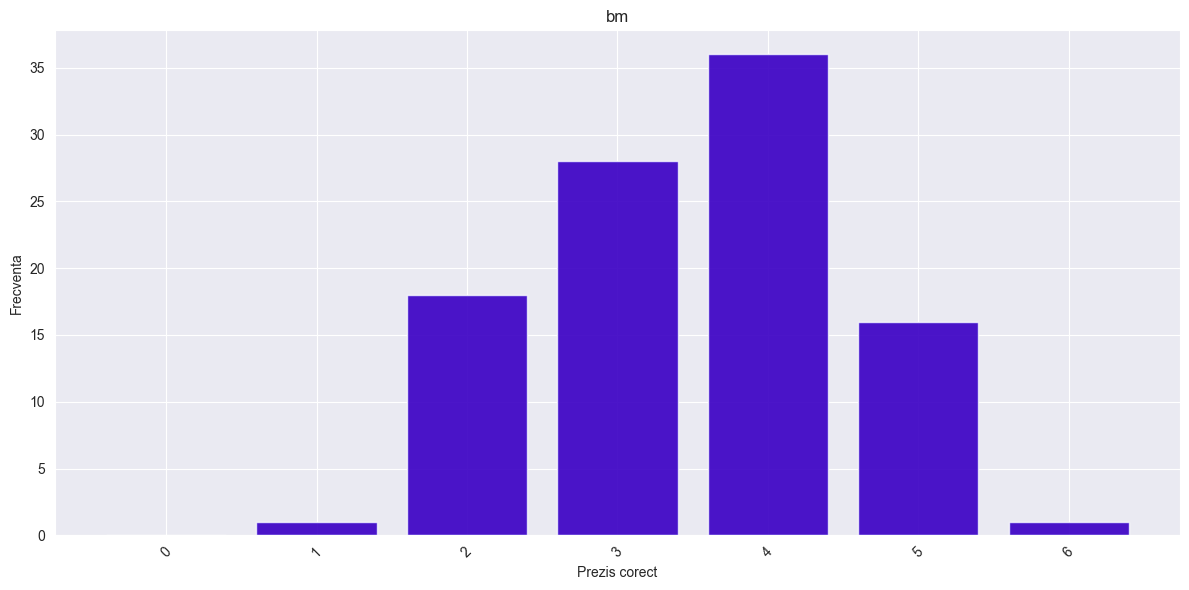

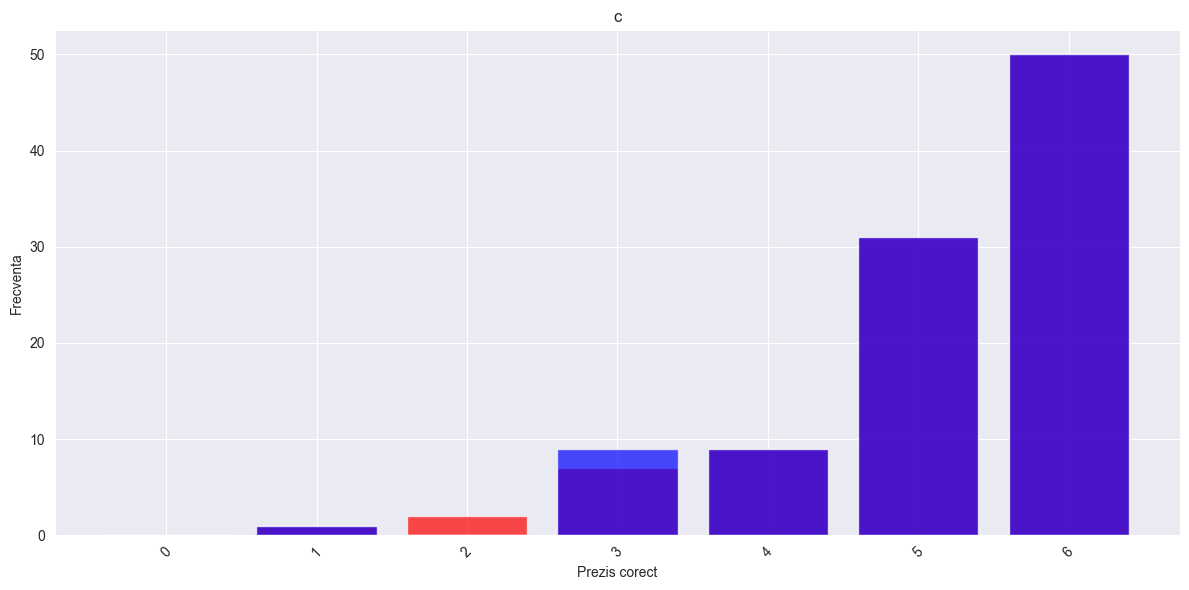

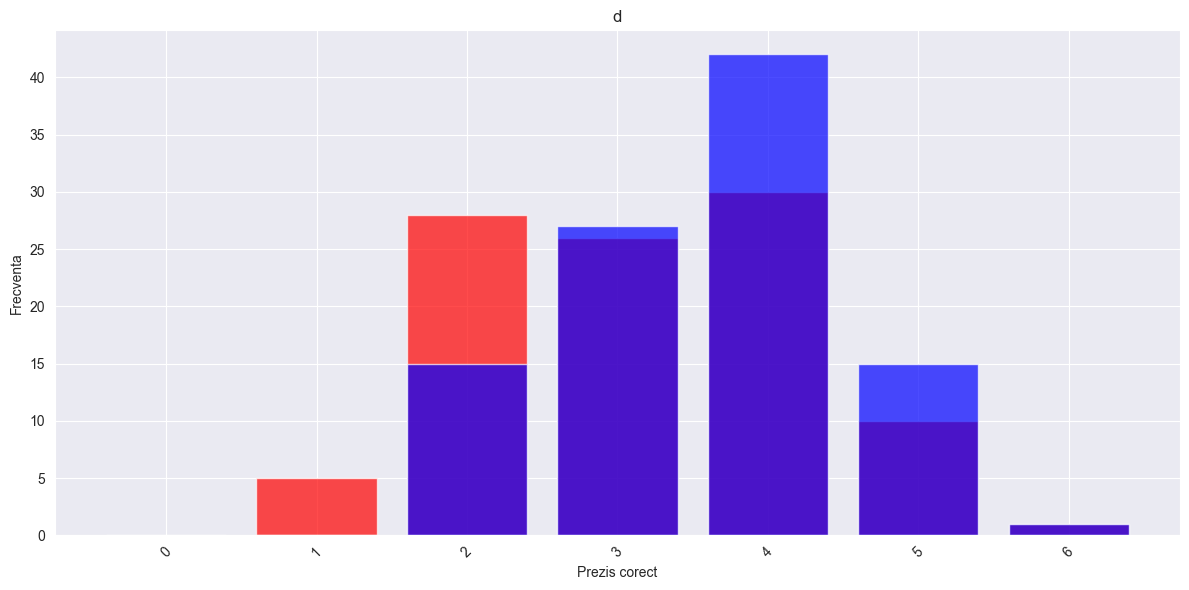

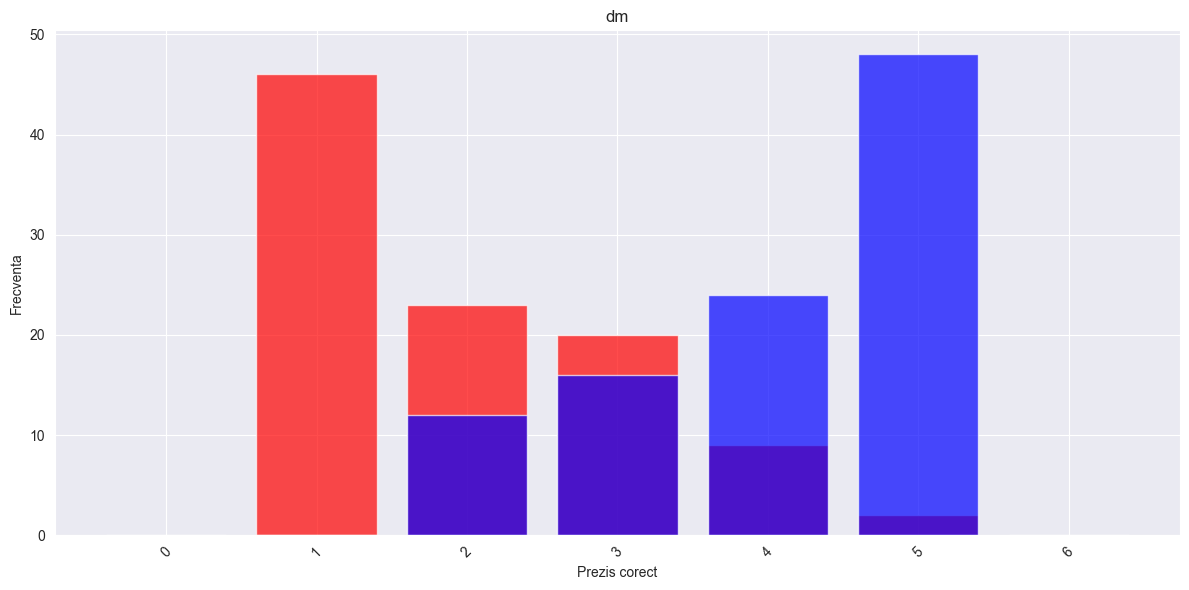

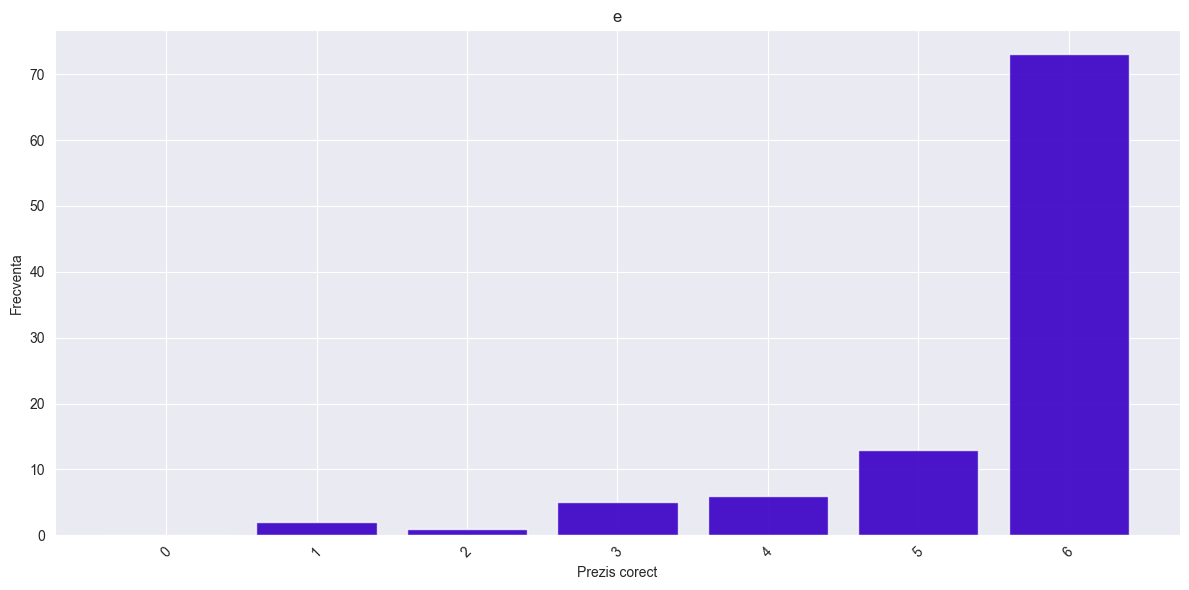

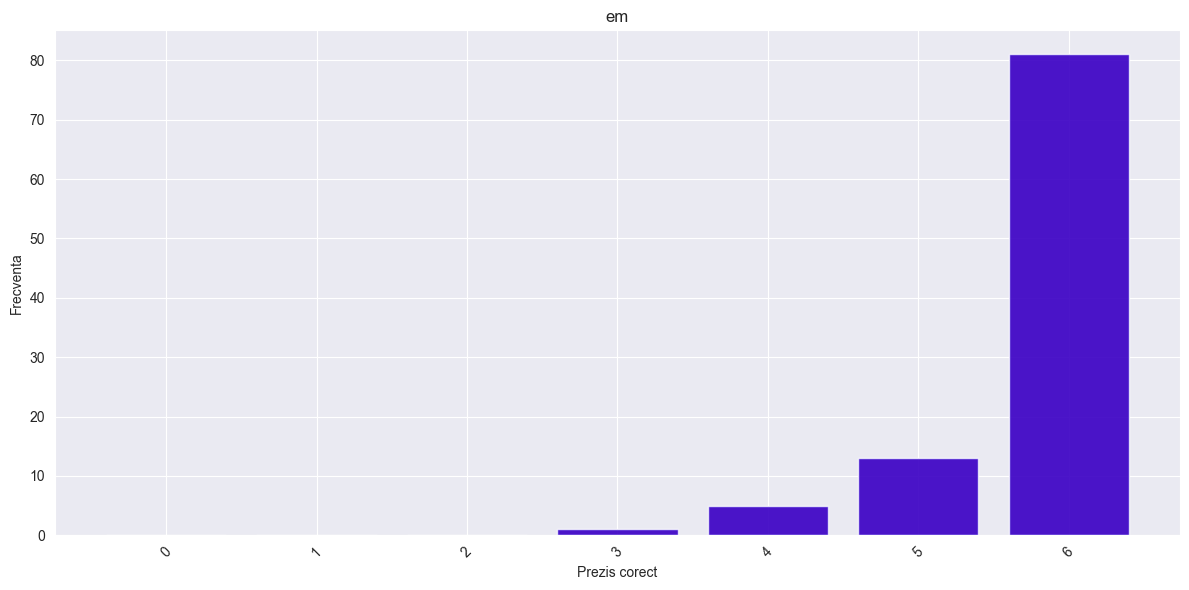

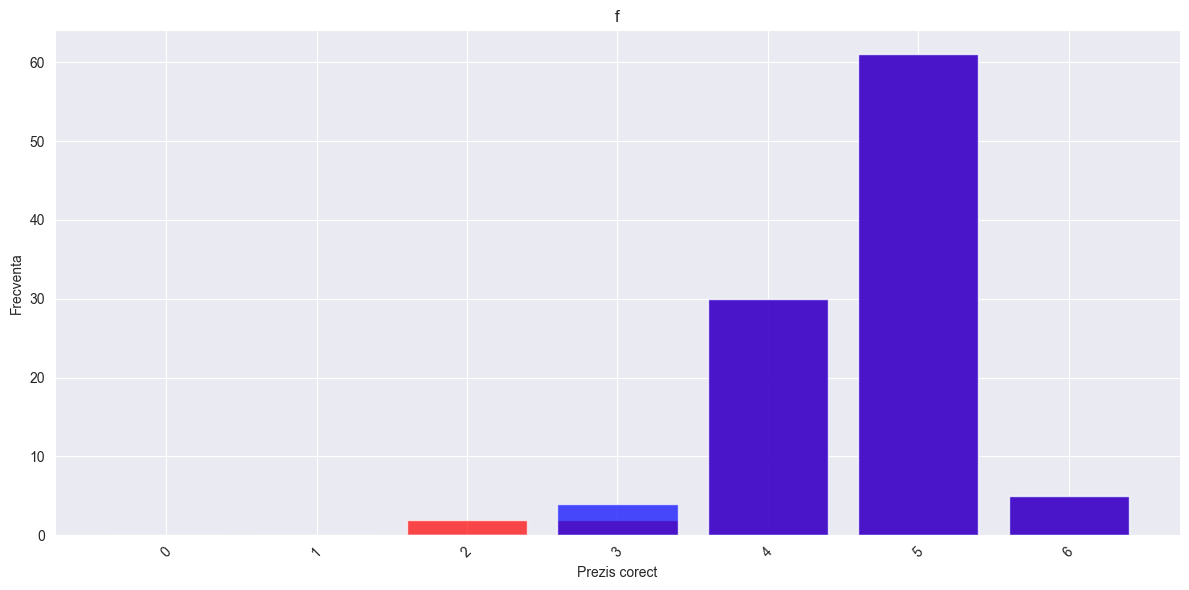

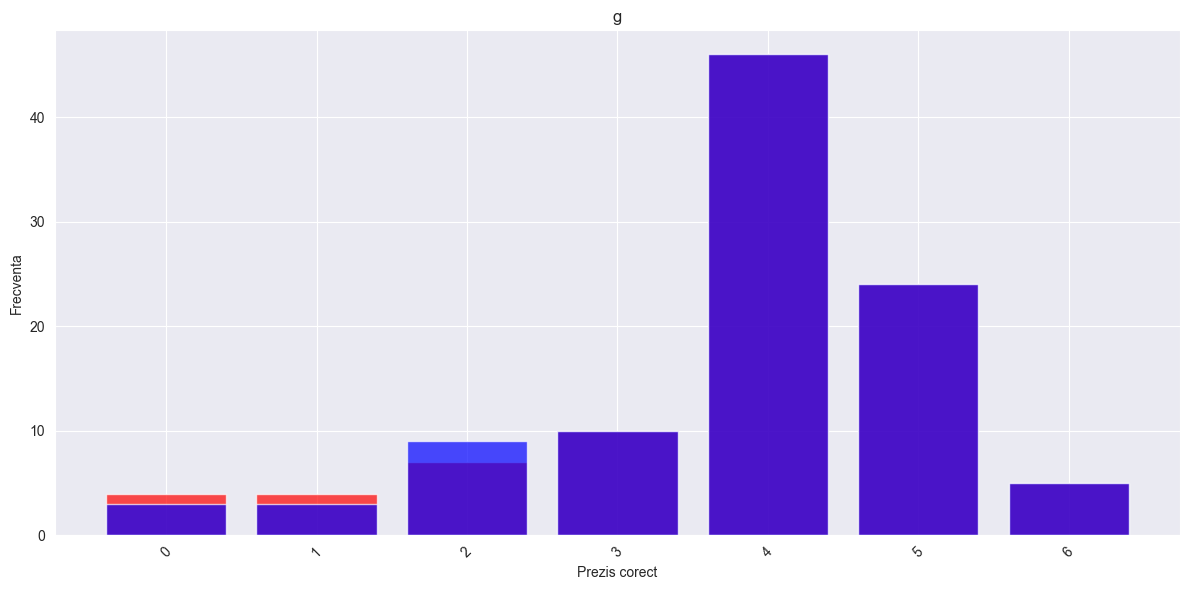

In [49]:
for chord_label in predictions.keys():
    plt.figure(figsize=(12,6))
    plt.bar(['0', '1', '2', '3', '4', '5', '6'], stats_tab[chord_label], color='red', alpha=0.7)
    plt.bar(['0', '1', '2', '3', '4', '5', '6'], stats_pitch[chord_label], color='blue', alpha=0.7, label='stats_pitch')
    plt.title(f'{chord_label}')
    plt.xlabel('Prezis corect')
    plt.ylabel('Frecventa')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()